<h1 style="text-align:center">House Prices : Advanced Regression Techniques</h3>

<h3 style="text-align:center">Load Libraries</h3>

In [1]:
import numpy as np
import pandas as pd 

# Visualizations
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



# plot feature importance
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel


C:\Users\Melan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3 style="text-align:center">Load Dataset</h3>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h3 style="text-align:center">Analyze Data</h3>

In [3]:
# Shape
print("Train_df shape:", train_df.shape ) 
print("Test_df shape:", test_df.shape )

Train_df shape: (1460, 81)
Test_df shape: (1459, 80)


In [4]:
# Peek at the first 5 rows of the data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Peek at the last 5 rows of the data
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# Check type of each column
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
# Select all the columns with missing values
# train_df.columns[train_df.isnull().any()]

missTrain_df = train_df.copy()
missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]
print("Column missing in training set:", missTrain_df.shape[1])

missTest_df = test_df.copy()
missTest_df = missTest_df.loc[:, missTest_df.isnull().any()]
print("Column with missing values in test set:", missTest_df.shape[1])


Column missing in training set: 19
Column with missing values in test set: 33


In [10]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We will check for the skewness of the SalePrice, our desired target feature

Skew is: 1.88287575977


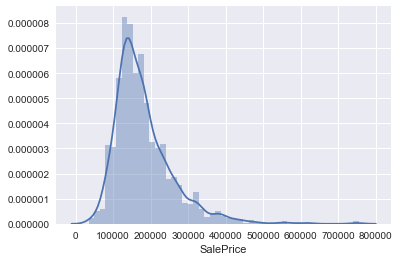

In [12]:
print( "Skew is:", train_df['SalePrice'].skew() )
sns.distplot(train_df['SalePrice'])

It is better to transform the data since it is skewed. A common way is to use the logarithm of the target variable, which is most likely work here since all values are positive (because logarithm is only positive).

Skew is: 0.121335062205


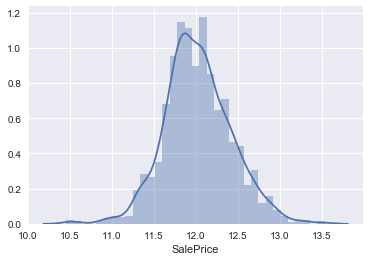

In [13]:
target = np.log(train_df['SalePrice'])
print( "Skew is:", target.skew() )
sns.distplot(target)

<h3 style="text-align:center">Feature Engineering</h3>

We will manipulate the features for them to be the most comprehensible for the machine learning algorithms

<b>1. Numerical Features</b>

In [17]:
num_features = train_df.select_dtypes(include=[np.number])
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

We can now examine the correlations between the numerical features and the target feature which is SalePrice.

In [28]:
corr = num_features.drop('Id', axis=1).corr()

# Features positively correlated with the sale prices
print( corr['SalePrice'].sort_values(ascending=False)[:10], "\n" )

# Features negatively correlated with the sale prices

print( corr['SalePrice'].sort_values(ascending=False)[-5:] )

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The correlations show how the features affect the sale price. <br>
A positive correlation means that the features increase/decrease as the sale prices increase/decrease. <br>
A negative correlation means that the features will decrease as the sale prices increase, as well as features will increase as the prices increase.

<u>OverallQual</u>

We examine the first feature that is highly correlated with the sale price


In [40]:
train_df['OverallQual'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

<h3 style="text-align:center">Data visualization</h3>

In [ ]:
train_df.drop('Id', axis=1).describe()

In [ ]:
sns.pointplot(x='YrSold', y='SalePrice', hue= 'YrSold', data=train_df)

plt.legend(bbox_to_anchor=(1.2, 0.7))
plt.xticks(rotation=20)
plt.yticks(rotation=15)
plt.title("Trend in sale prices over the years", fontsize=18)

We see that 2010 sold houses at lower prices(in mean terms) 
and that 2007 has the highest prices

In [ ]:
plt.figure(figsize=(8, 6))
sns.factorplot(x='YrSold',
               y='SalePrice', 
               data=train_df, 
               hue='YrSold', 
               col='YrSold', 
               kind='swarm',
               )  


<h3 style="text-align:center">Split-out dataset</h3>

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 46
scoring = 'neg_mean_squared_error'

In [ ]:
train_df.head()

The plot suggests that only one feature (79) is highly informative which is the 'SaleType' feature that describes the type of sale

<h3 style="text-align:center">Evaluate algorithms : Standardization</h3>

In [ ]:
# # Standardize the dataset
# pipelines = []
# pipelines.append( ('ScaledLR', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('Linear Regression', LinearRegression())] ) ) )

# pipelines.append( ('ScaledLasso', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('LASSO', Lasso())] ) ) )

# pipelines.append( ('ScaledRidge', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('Ridge', Ridge())] ) ) )

# pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('ElasticNet', ElasticNet())] ) ) )

# pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('ElasticNet', ElasticNet())] ) ) )

# pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('ElasticNet', ElasticNet())] ) ) )

# pipelines.append( ('ScaledKNN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('KNN', KNeighborsRegressor())] ) ) )

# pipelines.append( ('ScaledCART', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('CART', DecisionTreeRegressor())] ) ) )

# pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('SVR', KNeighborsRegressor())] ) ) )

# pipelines.append( ('ScaledRF', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('RF', RandomForestRegressor(random_state=seed))] ) ) )

# pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('SVR', KNeighborsRegressor())] ) ) )

# pipelines.append( ('ScaledXGB', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('XGB', XGBRegressor(seed=seed))] ) ) )

# # scoring = 'r2'
# scoring = 'neg_mean_squared_error'

# results = []
# names = []

# for name, model in pipelines: 
#     kfold = KFold(n_splits=num_folds, random_state= seed)
#     cv_results = cross_val_score(model, select_X_train, Y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %.10f (%.10f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
